## Week 4 
q1: A 90% confidence interval for the expected length of a project obtained from 200 replications is [100, 112] weeks. This confidence interval has width 12. Approximately what runlength will be needed to obtain a 95% confidence interval of width 2? (note the change in the confidence interval)

In [4]:
import math

def calculate_required_runlength(original_CI_width, desired_CI_width, original_num_replications):
    """Calculates the approximate runlength (number of replications) needed 
       to achieve a desired confidence interval width.

    Args:
        original_CI_width (float): The width of the original confidence interval.
        desired_CI_width (float): The desired width of the new confidence interval.
        original_num_replications (int): The number of replications used for the original confidence interval.

    Returns:
        int: The approximate runlength required for the new confidence interval.
    """

    scaling_factor = original_CI_width / desired_CI_width
    required_num_replications = original_num_replications * scaling_factor**2
    return round(required_num_replications)

# Get input from the user with validation
while True:
    try:
        original_CI_width = float(input("Enter the width of the original confidence interval: "))
        if original_CI_width <= 0:
            raise ValueError("Confidence interval width must be positive.")

        desired_CI_width = float(input("Enter the desired width of the new confidence interval: "))
        if desired_CI_width <= 0:
            raise ValueError("Confidence interval width must be positive.")

        original_num_replications = int(input("Enter the number of replications used for the original CI: "))
        if original_num_replications <= 0:
            raise ValueError("Number of replications must be positive.")
        break  # Exit the loop if all inputs are valid
    except ValueError as e:
        print(f"Invalid input: {e}")

# Calculate and print the result
required_runlength = calculate_required_runlength(original_CI_width, desired_CI_width, original_num_replications)
print("Approximate runlength required:", required_runlength)

Approximate runlength required: 18


q2: A certain random variable X has cdf (cumulative distribution function) F, where F(x) = 0 for x < 0, and F(x) = 1 -.5(x+1)^(-3) for x>= 0. Plot this cdf and derive an inversion algorithm for generating X. Use your algorithm to generate 1000 replications of X. Plot a histogram of the results. Also plot the empirical cdf of the results. 

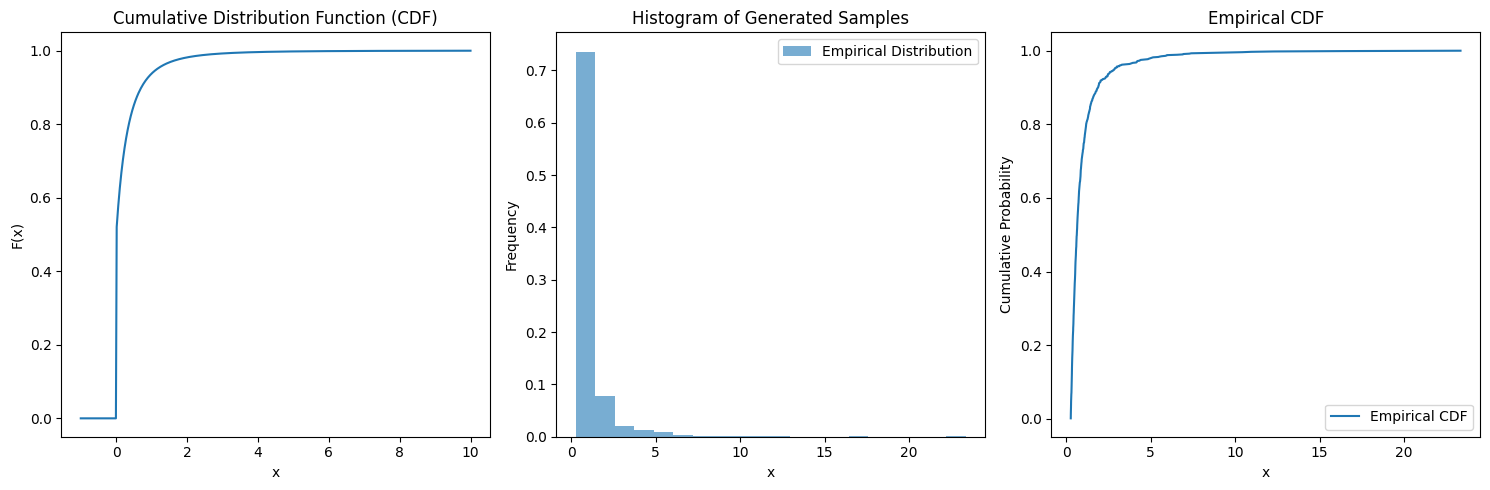

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function Definitions --- 
def F(x):
    """Cumulative distribution function (CDF) of the random variable X."""
    if x < 0:
        return 0
    else:
        return 1 - 0.5 * (x + 1)**(-3)

def inverse_F(u):
    """Inverse CDF (quantile function) of the random variable X.
    
    This function takes a uniform random variable (U) in the range [0, 1]
    and applies the inverse CDF transformation to generate a sample from
    the desired distribution.
    """
    return (2 / (1 - u))**(1/3) - 1

def ecdf(data):
    """Calculates the empirical cumulative distribution function (ECDF) of a dataset."""
    sorted_data = np.sort(data)
    n = len(data)
    return sorted_data, np.arange(1, n+1) / n 

# ---  Main Script ---
# Parameters 
num_replications = 1000  
x_min = -1  
x_max = 10 

# Generate x-values for plotting the CDF
x_values = np.linspace(x_min, x_max, 500) 
cdf_values = [F(x) for x in x_values]

# Generate random samples using the inversion method
uniform_samples = np.random.rand(num_replications) 
random_samples = [inverse_F(u) for u in uniform_samples]

# Calculate the ECDF for the generated samples
x_ecdf, y_ecdf = ecdf(random_samples)

# --- Plotting --- 
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1)
plt.plot(x_values, cdf_values)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')

plt.subplot(1, 3, 2) 
plt.hist(random_samples, bins=20, density=True, alpha=0.6, label='Empirical Distribution')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Samples')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x_ecdf, y_ecdf, label='Empirical CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF')
plt.legend()

plt.tight_layout() 
plt.show()

q3: The National Basketball Association (NBA) championship is a series of up to 7 games between 2 teams. The first team to win 4 games wins the series. Suppose that the probability that Team A beats Team B in any given game is p, independent of all other games. Let f(p) be the probability that Team A wins the NBA championship in terms of p. Generate a plot of f(p) and discuss the implications of the plot in one or two sentences. 

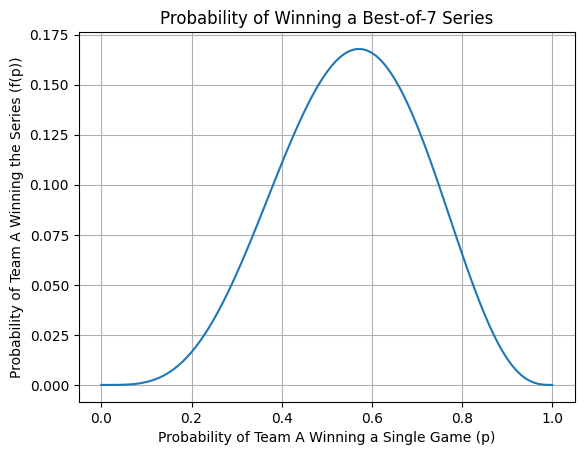

The plot shows that as the probability (p) of Team A winning a single game increases,
the probability of Team A winning the entire series (f(p)) also increases, as expected.
The curve is non-linear, indicating that even a small advantage in 'p' can significantly impact the series outcome.


In [6]:
import matplotlib.pyplot as plt
import math

def probability_team_A_wins_series(p, series_length=7, wins_needed=4):
    """Calculates the probability that Team A wins a best-of-series.

    Args:
        p (float): Probability of Team A winning a single game.
        series_length (int, optional): Total games in the series (must be odd). 
                                         Defaults to 7.
        wins_needed (int, optional): Number of wins required to win the series. 
                                      Defaults to 4.

    Returns:
        float: Probability of Team A winning the series.
    
    Raises:
        ValueError: If the series length is not odd or if 'wins_needed' is invalid.
    """
    if series_length % 2 == 0:
        raise ValueError("Series length must be an odd number.")
    if wins_needed <= 0 or wins_needed > series_length:
        raise ValueError("Invalid value for 'wins_needed'.")
    
    total_prob = 0
    for i in range(wins_needed -1, series_length - wins_needed + 1):
        total_prob += math.comb(i + wins_needed -1, i) * (p ** wins_needed) * ((1-p) ** i) 
    return total_prob 

# Generate probabilities for different 'p' values
p_values = [i/100 for i in range(101)] 
probabilities = [probability_team_A_wins_series(p) for p in p_values]

# Plot the results
plt.plot(p_values, probabilities)
plt.xlabel("Probability of Team A Winning a Single Game (p)")
plt.ylabel("Probability of Team A Winning the Series (f(p))")
plt.title("Probability of Winning a Best-of-7 Series")
plt.grid(True)
plt.show()

# Discussion
print("The plot shows that as the probability (p) of Team A winning a single game increases,")
print("the probability of Team A winning the entire series (f(p)) also increases, as expected.") 
print("The curve is non-linear, indicating that even a small advantage in 'p' can significantly impact the series outcome.")